make structures.

In [ ]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from calorine.calculators import CPUNEP

symbol_infos = [
SymbolInfo('Mo', 'bcc', 3.164),
SymbolInfo('Ta', 'bcc', 3.319),
SymbolInfo('V',  'bcc', 2.997),
SymbolInfo('W',  'bcc', 3.185)
]
for symbol_info in symbol_infos:
    atoms = symbol_info.create_bulk_atoms()
    calc = CPUNEP('../potentials/4-4-80/nep.txt')
    material_calculator = MaterialCalculator(atoms, calc, symbol_info)  
    material_calculator.bcc_metal_screw_dipole_move()

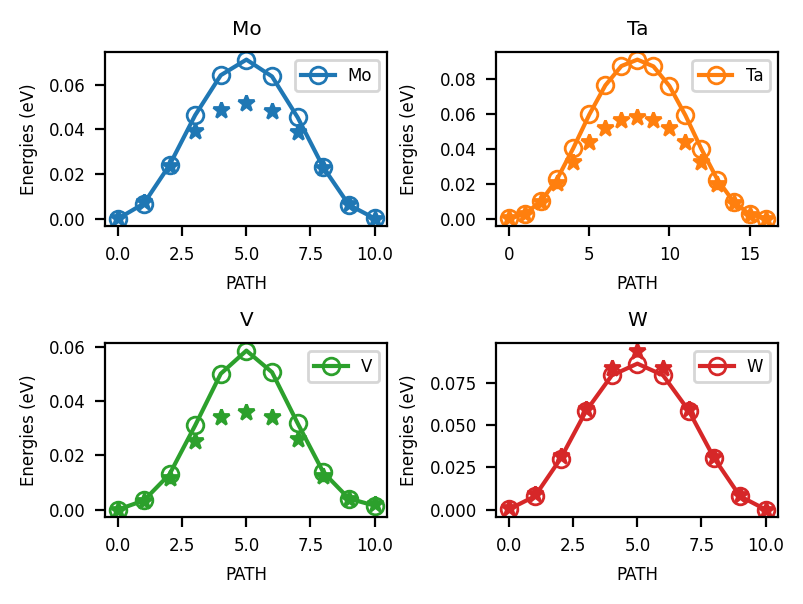

In [5]:
from matplotlib import pyplot as plt
from calorine.calculators import CPUNEP
from wizard.io import read_xyz
%matplotlib inline

calc = CPUNEP('../potentials/4-4-80/nep.txt')
symbols = ['Mo', 'Ta', 'V', 'W']

frames = read_xyz('ref.xyz')
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 6
fig, axes = plt.subplots(
    figsize=(4, 3),
    dpi=200,
    nrows=2,
    ncols=2,
    sharex = False,
    sharey=False
)
data = {}
for symbol in symbols:
    data[symbol] = {}
    data[symbol]['nep'] = []
    data[symbol]['dft'] = []
    for atoms in frames:
        atoms.calc = calc
        if set(atoms.get_chemical_symbols()) == {symbol}:
            data[symbol]['nep'].append(atoms.get_potential_energy() / 2)
            data[symbol]['dft'].append(atoms.info['energy'] / 2)

for k, (species, values) in enumerate(data.items()):
    color = f'C{k}'
    if species == 'Mo':
        nep = [value - min(values['nep']) for value in values['nep']]
        dft = [value - min(values['dft']) for value in values['dft']]
        axes[0][0].plot(nep, 'o-', color=color, label=species, fillstyle='none')
        axes[0][0].plot(dft, '*', color=color)
        axes[0][0].legend()
        axes[0][0].set_xlabel('PATH')
        axes[0][0].set_ylabel('Energies (eV)')
        axes[0][0].set_title('Mo')
    if species == 'Ta':
        nep = [value - min(values['nep']) for value in values['nep']]
        dft = [value - min(values['dft']) for value in values['dft']]
        axes[0][1].plot(nep, 'o-', color=color, label=species, fillstyle='none')
        axes[0][1].plot(dft, '*', color=color)
        axes[0][1].legend()
        axes[0][1].set_xlabel('PATH')
        axes[0][1].set_ylabel('Energies (eV)')
        axes[0][1].set_title('Ta')
    if species == 'V':
        nep = [value - min(values['nep']) for value in values['nep']]
        dft = [value - min(values['dft']) for value in values['dft']]
        axes[1][0].plot(nep, 'o-', color=color, label=species, fillstyle='none')
        axes[1][0].plot(dft, '*', color=color)
        axes[1][0].legend()
        axes[1][0].set_xlabel('PATH')
        axes[1][0].set_ylabel('Energies (eV)')
        axes[1][0].set_title('V')
    if species == 'W':
        nep = [value - min(values['nep']) for value in values['nep']]
        dft = [value - min(values['dft']) for value in values['dft']]
        axes[1][1].plot(nep, 'o-', color=color, label=species, fillstyle='none')
        axes[1][1].plot(dft, '*', color=color)
        axes[1][1].legend()
        axes[1][1].set_xlabel('PATH')
        axes[1][1].set_ylabel('Energies (eV)')
        axes[1][1].set_title('W')

fig.tight_layout()
fig.align_ylabels(axes)
plt.savefig('screw.png')
plt.show()